In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [14]:
amelia_df = pd.read_csv("C:/Users/jsuresh/OneDrive - Institute for Disease Modeling/Projects/SAC IPT/ITN coverages/fig_2_access_use_timeseries.csv")

In [16]:
amelia_df = pd.read_csv("C:/Users/jsuresh/OneDrive - Institute for Disease Modeling/Projects/SAC IPT/ITN coverages/fig_2_access_use_timeseries.csv")

ssa_df = amelia_df[amelia_df["country_name"]=="SSA"]
ssa_use = ssa_df[ssa_df["variable"]=="use"].reset_index(drop=True)
ssa_access = ssa_df[ssa_df["variable"]=="access"].reset_index(drop=True)

zambia_df = amelia_df[amelia_df["country_name"]=="Zambia"]
zambia_use = zambia_df[zambia_df["variable"]=="use"].reset_index(drop=True)
zambia_access = zambia_df[zambia_df["variable"]=="access"].reset_index(drop=True)

bf_df = amelia_df[amelia_df["country_name"]=="Burkina Faso"]
bf_use = bf_df[bf_df["variable"]=="use"].reset_index(drop=True)
bf_access = bf_df[bf_df["variable"]=="access"].reset_index(drop=True)

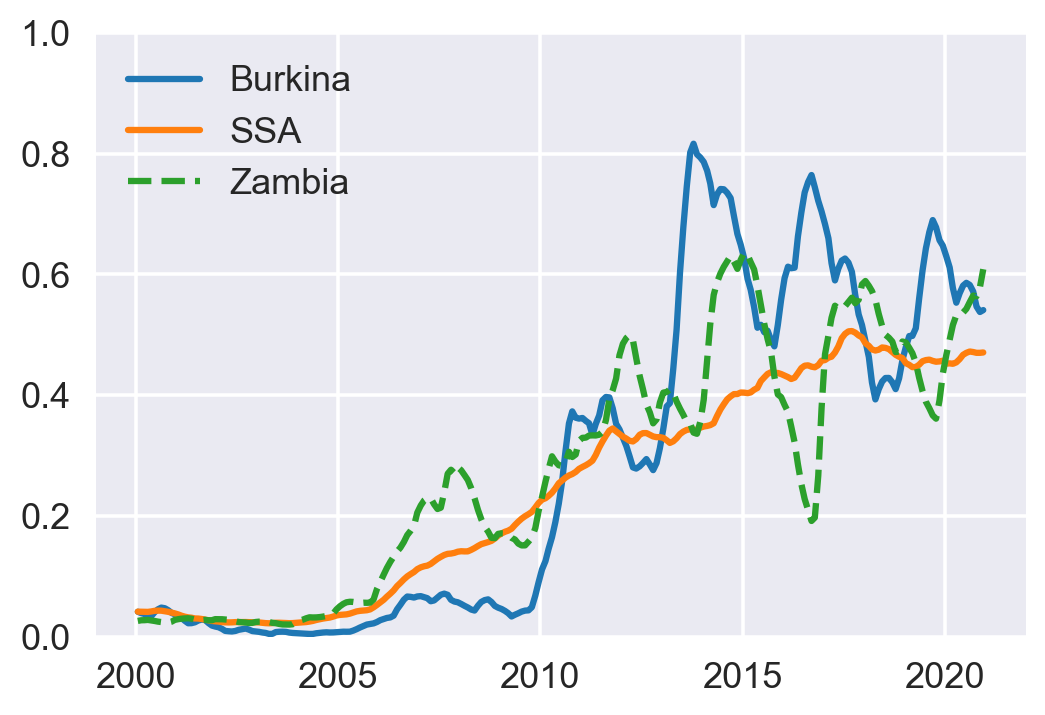

In [18]:
plt.figure(dpi=200)
plt.plot(bf_use["time"], bf_use["mean_among_atrisk"], label="Burkina", linestyle='solid')
plt.plot(ssa_use["time"], ssa_use["mean_among_atrisk"], label="SSA", linestyle='solid')
plt.plot(zambia_use["time"], zambia_use["mean_among_atrisk"], label="Zambia", linestyle='dashed')
# plt.plot(amelia_use["time"], amelia_use["mean_among_atrisk"]*1/0.869/0.75, label="inferred coverage")
plt.ylim([0,1])
plt.legend()

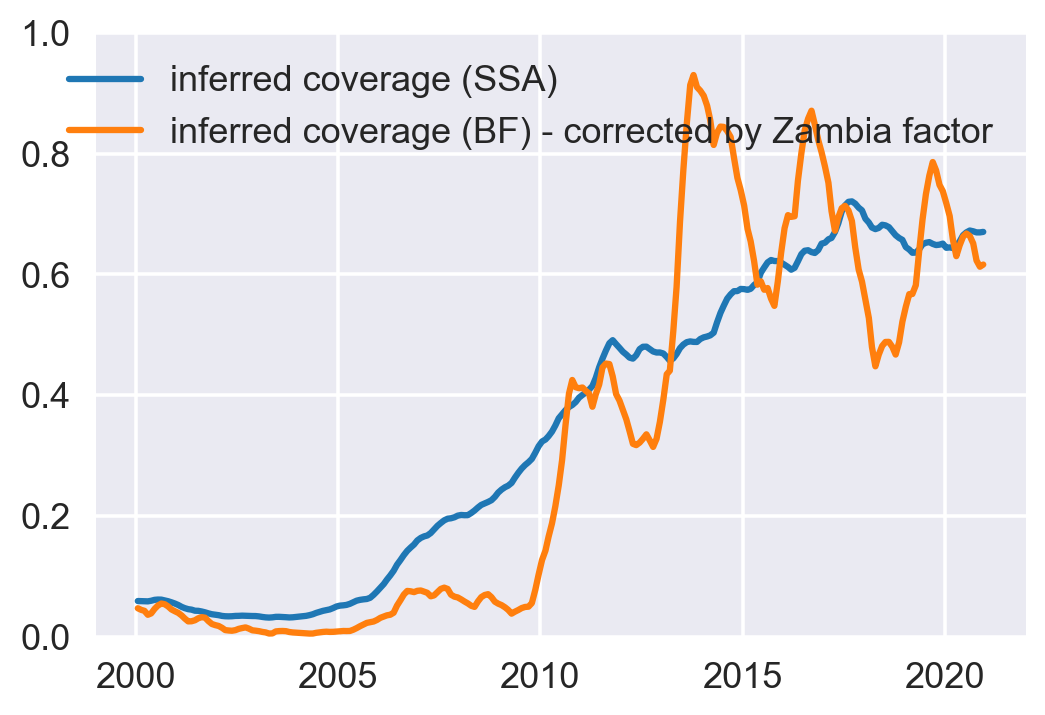

In [27]:
plt.figure(dpi=200)
zambia_correction_factor = 0.8
plt.plot(ssa_use["time"], ssa_use["mean_among_atrisk"]*1/0.869/0.808, label="inferred coverage (SSA)")
plt.plot(bf_use["time"], bf_use["mean_among_atrisk"]*1/0.869/0.808*zambia_correction_factor, label="inferred coverage (BF) - corrected by Zambia factor")
plt.ylim([0,1])
plt.legend()

0.8083333333333335


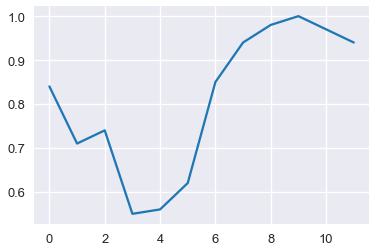

In [21]:
sahel_seasonal_itn_use = np.array([
    0.84,
    0.71,
    0.74,
    0.55,
    0.56,
    0.62,
    0.85,
    0.94,
    0.98,
    1,
    0.97,
    0.94
])

plt.plot(sahel_seasonal_itn_use)
print(np.mean(sahel_seasonal_itn_use))

3/31/21: Go with SSA for now

In [28]:
ssa_use_binned = ssa_use.groupby("year").agg({"mean_among_atrisk": "mean",
                                                   "lower_among_atrisk": "mean",
                                                   "upper_among_atrisk": "mean"}).reset_index()
ssa_use_binned["inferred_coverage"] = ssa_use_binned["mean_among_atrisk"]*1/0.869/0.808
ssa_use_binned["inferred_coverage_low"] = ssa_use_binned["lower_among_atrisk"]*1/0.869/0.808
ssa_use_binned["inferred_coverage_high"] = ssa_use_binned["upper_among_atrisk"]*1/0.869/0.808

Text(0, 0.5, 'Inferred ITN coverage for Sahel')

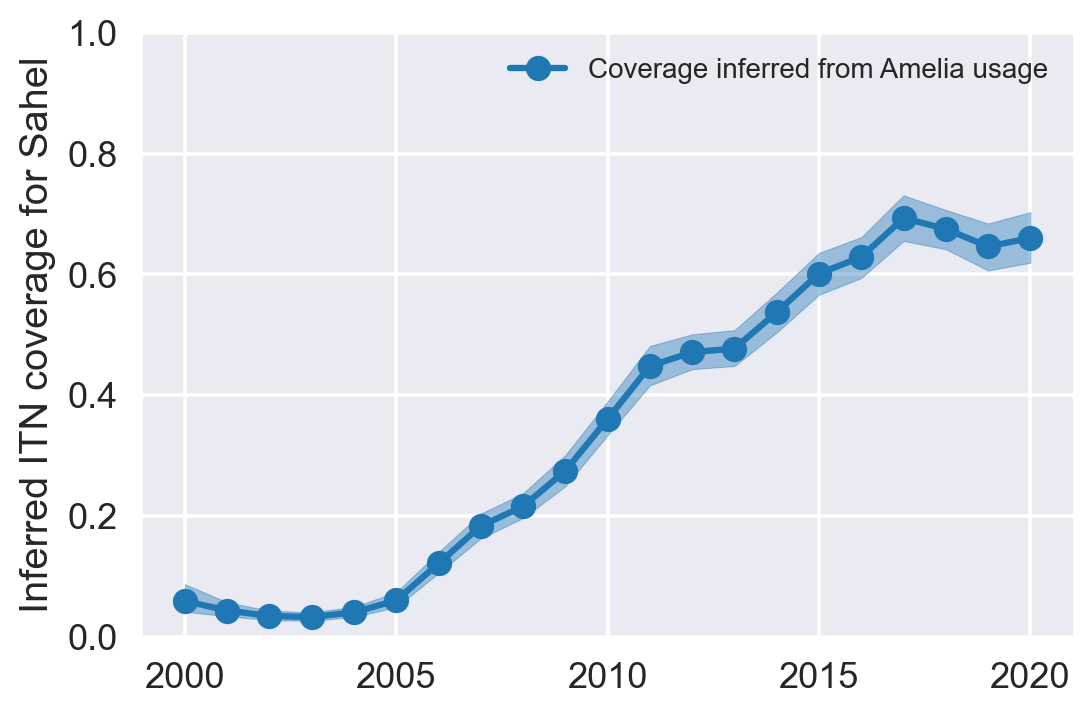

In [34]:
plt.figure(dpi=200)
plt.plot(ssa_use_binned["year"], ssa_use_binned["inferred_coverage"], label="Coverage inferred from Amelia usage", marker='o')
plt.fill_between(ssa_use_binned["year"], 
                 ssa_use_binned["inferred_coverage_low"],
                 ssa_use_binned["inferred_coverage_high"],
                color="C0",alpha=0.4)

plt.ylim([0,1])
plt.legend(fontsize=10)
plt.ylabel("Inferred ITN coverage for Sahel")

In [39]:
spline1 = ssa_use_binned.copy(deep=True)
spline1["cov_all"] = spline1["inferred_coverage"]
spline1 = spline1[["year", "cov_all"]]
spline1["source"] = "amelia usage for ssa"

In [42]:
spline1.to_csv("../ssa_historical_itn.csv", index=False)